In [ ]:
types = ["age", "edu", "incom", "job", "sex"]
columns = ["年齡層", "教育程度類別", "年收入", "職業類別", "性別"]

for item, column in zip(types, columns):
    with open(f"six_{item}_2023.csv", "r", encoding="utf-8") as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            __insert_data(
                conn,
                tablename=item,
                values=[
                    row["年"],
                    row["月"],
                    row["地區"],
                    row["產業別"],
                    row[f"{columns}"],
                    row["信用卡交易筆數"],
                    row["信用卡交易金額"],
                ],
            )

[6.50251624e+12 6.50251624e+12 6.50251624e+12 ... 6.56814910e+12
 6.56814910e+12 6.56814910e+12]


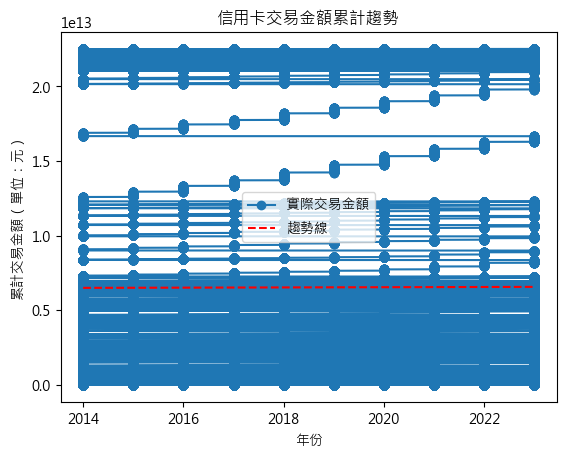

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 將十年的信用卡交易金額相加
df['累計交易金額'] = df['信用卡交易金額[新台幣]'].cumsum()

# 準備X（年份）和y（累計交易金額）的資料
X = np.array(df['年']).reshape(-1, 1)
y = np.array(df['累計交易金額'])

# 建立線性回歸模型
model = LinearRegression()

# 適應模型
model.fit(X, y)

# 生成預測
y_pred = model.predict(X)
print(y_pred)

# 繪製折線圖和趨勢線
plt.plot(df['年'], df['累計交易金額'], marker='o', linestyle='-', label='實際交易金額')
plt.plot(df['年'], y_pred, color='red', linestyle='--', label='趨勢線')

# 添加標籤
plt.title('信用卡交易金額累計趨勢')
plt.xlabel('年份')
plt.ylabel('累計交易金額（單位：元）')

# 顯示圖例
plt.legend()

# 顯示圖表
plt.show()


In [26]:
import pandas as pd

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 根據地區分組
grouped_df = df.groupby('地區')

# 計算每個地區的「信用卡金額」的年成長率
for name, group in grouped_df:
    group['年成長率'] = (group['信用卡交易金額[新台幣]'].pct_change() * 100).fillna(0)

    # 可以將結果存儲到新的DataFrame或繪製圖表
    print(f"地區: {name}")
    print(group[['年', '月', '信用卡交易金額[新台幣]', '年成長率']])
    print("\n")


地區: 南投縣
           年  月  信用卡交易金額[新台幣]         年成長率
252252  2014  1         26821     0.000000
252253  2014  1       1578313  5784.616532
252254  2014  1       5520306   249.759902
252255  2014  1      10178812    84.388547
252256  2014  1      14568166    43.122459
...      ... ..           ...          ...
275179  2023  9      14302363   -13.813628
275180  2023  9       6905546   -51.717447
275181  2023  9       3406577   -50.668970
275182  2023  9        724855   -78.721896
275183  2023  9        387688   -46.515096

[22932 rows x 4 columns]


地區: 嘉義市
          年  月  信用卡交易金額[新台幣]         年成長率
22932  2014  1         93082     0.000000
22933  2014  1       2738338  2841.855568
22934  2014  1       8092427   195.523306
22935  2014  1      14934827    84.553126
22936  2014  1      21118032    41.401250
...     ... ..           ...          ...
45859  2023  9       7799572   -31.054226
45860  2023  9       4713413   -39.568312
45861  2023  9       1897742   -59.737413
45862  2023  9      

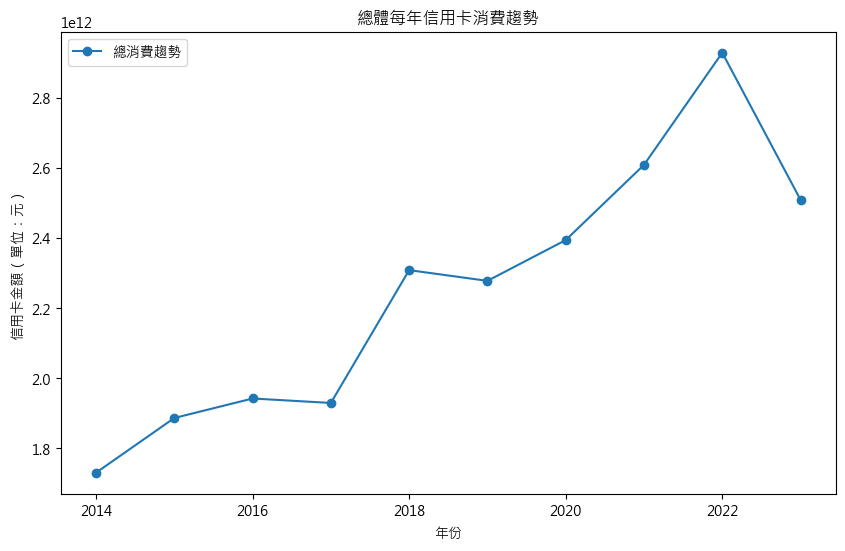

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製整體每年的信用卡消費趨勢
plt.figure(figsize=(10, 6))
plt.plot(total_by_year['年'], total_by_year['信用卡交易金額[新台幣]'], marker='o', linestyle='-', label='總消費趨勢')

# 添加標籤
plt.title('總體每年信用卡消費趨勢')
plt.xlabel('年份')
plt.ylabel('信用卡金額（單位：元）')
plt.legend()



# 顯示圖表
plt.show()


posx and posy should be finite values
posx and posy should be finite values


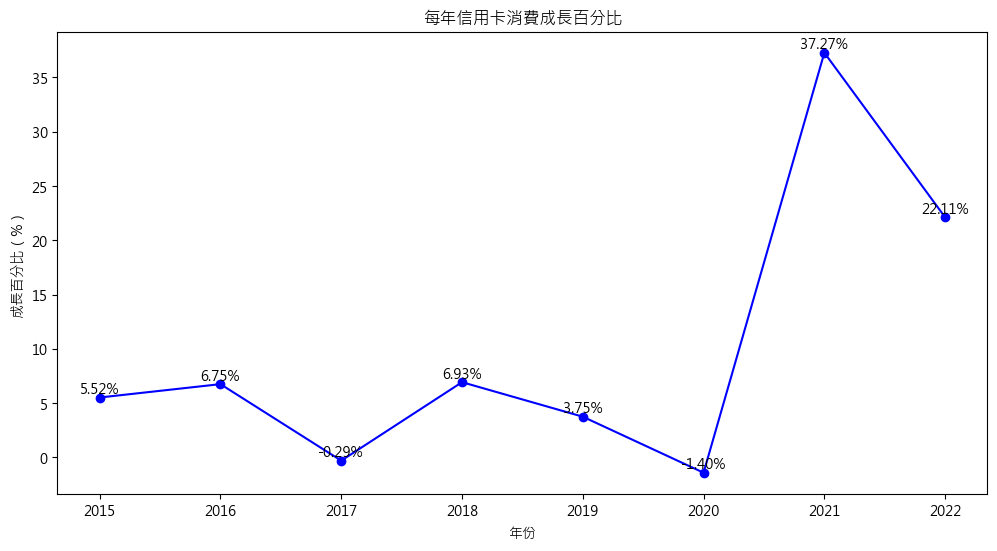

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('../processed_dataset.csv')

# 排除2023年的資料
df = df[df['年'] < 2023]

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 計算每年相對於前一年的成長百分比
total_by_year['成長百分比'] = total_by_year['信用卡交易金額[新台幣]'].pct_change() * 100

# 將每年的成長百分比列出
plt.figure(figsize=(12, 6))
plt.plot(total_by_year['年'], total_by_year['成長百分比'], marker='o', linestyle='-', color='blue')
plt.title('每年信用卡消費成長百分比')
plt.xlabel('年份')
plt.ylabel('成長百分比（%）')

# 顯示成長百分比數值
for i, value in enumerate(total_by_year['成長百分比']):
    plt.text(total_by_year['年'][i], value, f'{value:.2f}%', ha='center', va='bottom')

# 顯示圖表
plt.show()


In [30]:
# Calculate average growth rate from available data
average_growth_rate = total_by_year['成長百分比'].mean()

# Estimate growth for 2023
estimated_growth_2023 = total_by_year['信用卡交易金額[新台幣]'].iloc[-1] * (1 + average_growth_rate / 100)

print(f"Estimated growth rate for 2023: {average_growth_rate:.2f}%")
print(f"Estimated total credit card transactions in 2023: {estimated_growth_2023:.2f} 新台幣")


Estimated growth rate for 2023: 10.08%
Estimated total credit card transactions in 2023: 1925210183926.92 新台幣


c:\GitHub\ctest\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\GitHub\ctest\.venv\lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


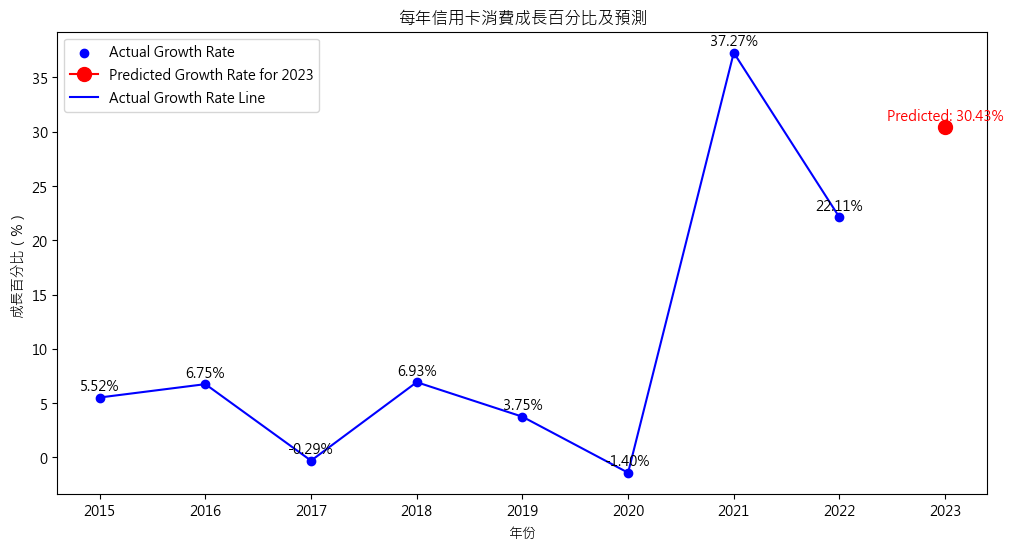

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('./six_test.csv')

# 排除2023年的資料
df = df[df['年'] < 2023]

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 計算每年相對於前一年的成長百分比
total_by_year['成長百分比'] = total_by_year['信用卡交易金額[新台幣]'].pct_change() * 100

# Drop NaN values resulting from percentage change
total_by_year = total_by_year.dropna()

# 以年份作為特徵，成長百分比作為目標值
X = total_by_year[['年']]
y = total_by_year['成長百分比']

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測2023年的成長百分比
predicted_growth_2023 = model.predict([[2023]])[0]

# 繪製預測結果
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Growth Rate')
plt.plot([2023], [predicted_growth_2023], marker='o', markersize=10, color='red', label='Predicted Growth Rate for 2023')
plt.plot(X, y, linestyle='-', color='blue', label='Actual Growth Rate Line')

# 標示每年的成長百分比
for i, txt in enumerate(y):
    plt.annotate(f'{txt:.2f}%', (X.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

# 標示預測值
plt.annotate(f'Predicted: {predicted_growth_2023:.2f}%', (2023, predicted_growth_2023), textcoords="offset points", xytext=(0,5), ha='center', color='red')

plt.title('每年信用卡消費成長百分比及預測')
plt.xlabel('年份')
plt.ylabel('成長百分比（%）')
plt.legend()
plt.show()


      年   信用卡交易金額[新台幣]      成長百分比
1  2015   896059899537   5.522222
2  2016   956571928605   6.753123
3  2017   953753568911  -0.294631
4  2018  1019881635560   6.933454
5  2019  1058173320699   3.754522
6  2020  1043310871949  -1.404538
7  2021  1432181642943  37.272761
8  2022  1748897075300  22.114194


c:\GitHub\ctest\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\GitHub\ctest\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\GitHub\ctest\.venv\lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


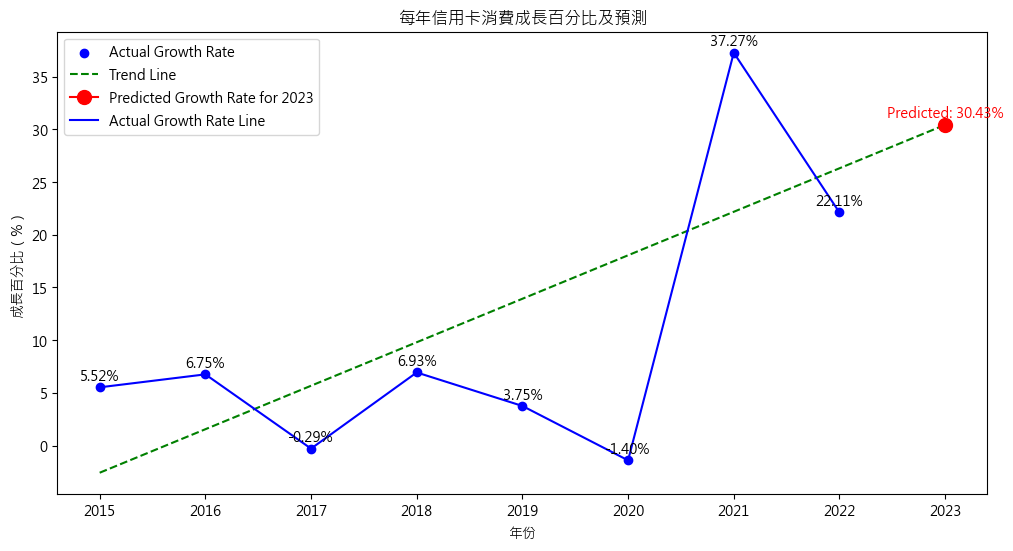

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('../processed_dataset.csv')

# 排除2023年的資料
df = df[df['年'] < 2023]

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 計算每年相對於前一年的成長百分比
total_by_year['成長百分比'] = total_by_year['信用卡交易金額[新台幣]'].pct_change() * 100

# Drop NaN values resulting from percentage change
total_by_year = total_by_year.dropna()

print(total_by_year)

# 以年份作為特徵，成長百分比作為目標值
X = total_by_year[['年']]
y = total_by_year['成長百分比']

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測2023年的成長百分比
predicted_growth_2023 = model.predict([[2023]])[0]

# 預測整個年份範圍的成長百分比
X_range = np.arange(total_by_year['年'].min(), 2024).reshape(-1, 1)
predicted_trend = model.predict(X_range)

# 繪製預測結果
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Growth Rate')
plt.plot(X_range, predicted_trend, linestyle='--', color='green', label='Trend Line')
plt.plot([2023], [predicted_growth_2023], marker='o', markersize=10, color='red', label='Predicted Growth Rate for 2023')
plt.plot(X, y, linestyle='-', color='blue', label='Actual Growth Rate Line')

# 標示每年的成長百分比
for i, txt in enumerate(y):
    plt.annotate(f'{txt:.2f}%', (X.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# 標示預測值
plt.annotate(f'Predicted: {predicted_growth_2023:.2f}%', (2023, predicted_growth_2023), textcoords="offset points", xytext=(0, 5), ha='center', color='red')

plt.title('每年信用卡消費成長百分比及預測')
plt.xlabel('年份')
plt.ylabel('成長百分比（%）')
plt.legend()
plt.show()


預測下個月的成長率: 168928620.539513


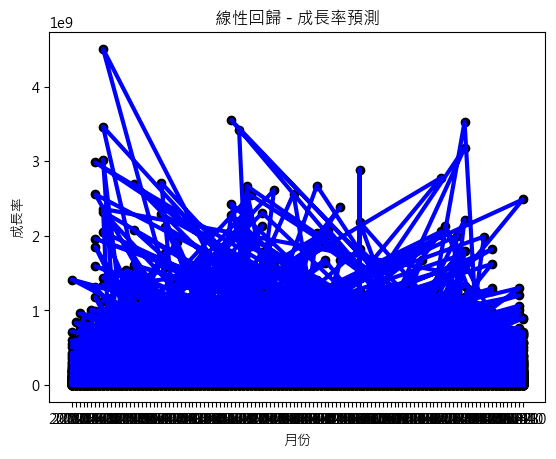

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('./six_test.csv')

# 資料前處理
df['年月'] = df['年月'].astype(str)
df['GrowthRate'] = df['信用卡交易金額[新台幣]']  # 用實際的列名替換

# 特徵工程
X = df[['年月', '產業別', '地區', '性別', '年齡層', '信用卡交易筆數', '信用卡交易金額[新台幣]']]
y = df['GrowthRate']  # 目標變量

# 訓練測試集拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定義需要獨熱編碼的分類特徵
categorical_features = ['產業別', '地區', '性別', '年齡層']

# 創建獨熱編碼的轉換器
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# 創建包含預處理和線性回歸的管道
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 訓練模型
model.fit(X_train, y_train)

# 預測下個月的成長率
next_month = pd.DataFrame({
    '年月': ['20230101'],  # 保持 '年月' 為字符串形式
    '產業別': ['衣'],  # 用實際的產業替換
    '地區': ['臺北市'],  # 用實際的地區替換
    '性別': ['男性'],  # 用實際的地區替換
    '年齡層': ['20(含)-25歲'],  # 用實際的年齡層替換
    '信用卡交易筆數': [64524],  # 用實際的交易筆數替換
    '信用卡交易金額[新台幣]': [168928659]  # 用實際的交易金額替換
})

predicted_growth_rate = model.predict(next_month)

print(f'預測下個月的成長率: {predicted_growth_rate[0]}')

# 可視化（可選）
plt.scatter(X_test['年月'], y_test, color='black')
plt.plot(X_test['年月'], model.predict(X_test), color='blue', linewidth=3)
plt.title('線性回歸 - 成長率預測')
plt.xlabel('月份')
plt.ylabel('成長率')
plt.show()


In [ ]:
import pandas as pd

# 讀取CSV檔案
df = pd.read_csv('./six_test.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年月'], format='%Y%m')
df['GrowthRate'] = df['信用卡交易金額[新台幣]']  # 用實際的列名替換

# 按日期排序
df = df.sort_values(by='年月')

# 計算每個時間點相對於前一個時間點的成長率
df['MonthlyGrowthRate'] = df.groupby('年月')['GrowthRate'].pct_change()

# 顯示結果
print(df[['年月', 'MonthlyGrowthRate']])

df


In [24]:
import pandas as pd

# 讀取CSV檔案
df = pd.read_csv('./six_test.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年月'], format='%Y%m')

# 提取年月信息为字符串形式
df['年月'] = df['年月'].dt.strftime('%Y%m')

# 按照年月分组，計算每年各個月份的信用卡消費總額
monthly_total_expenses = df.groupby(['年月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 顯示結果
print(monthly_total_expenses)


         年月  信用卡交易金額[新台幣]
0    201401   76800411337
1    201402   62505801850
2    201403   63526607164
3    201404   65788821735
4    201405   70200355390
..      ...           ...
112  202305  168882656190
113  202306  162415021002
114  202307  170739795168
115  202308  179663600973
116  202309  181112276478

[117 rows x 2 columns]


In [29]:
import pandas as pd

# 讀取CSV檔案
df = pd.read_csv('./six_test.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年月'], format='%Y%m')

# 提取年月信息为字符串形式
df['年月'] = df['年月'].dt.strftime('%Y%m')

# 按照年月分组，计算每年各个月份的信用卡消费总额
monthly_total_expenses = df.groupby(['年月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 计算每月的成长率
monthly_total_expenses['成長率'] = monthly_total_expenses['信用卡交易金額[新台幣]'].pct_change()

# 移除第一行，因为成长率对于第一个月无效
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 顯示結果
print(monthly_total_expenses)


         年月  信用卡交易金額[新台幣]       成長率
1    201402   62505801850 -0.186127
2    201403   63526607164  0.016331
3    201404   65788821735  0.035611
4    201405   70200355390  0.067056
5    201406   68195962076 -0.028552
..      ...           ...       ...
112  202305  168882656190  0.037439
113  202306  162415021002 -0.038297
114  202307  170739795168  0.051256
115  202308  179663600973  0.052266
116  202309  181112276478  0.008063

[116 rows x 3 columns]


         年月  信用卡交易金額[新台幣]       成長率    年份
1    201402   62505801850 -0.186127  2014
2    201403   63526607164  0.016331  2014
3    201404   65788821735  0.035611  2014
4    201405   70200355390  0.067056  2014
5    201406   68195962076 -0.028552  2014
..      ...           ...       ...   ...
112  202305  168882656190  0.037439  2023
113  202306  162415021002 -0.038297  2023
114  202307  170739795168  0.051256  2023
115  202308  179663600973  0.052266  2023
116  202309  181112276478  0.008063  2023

[116 rows x 4 columns]


c:\GitHub\ctest\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


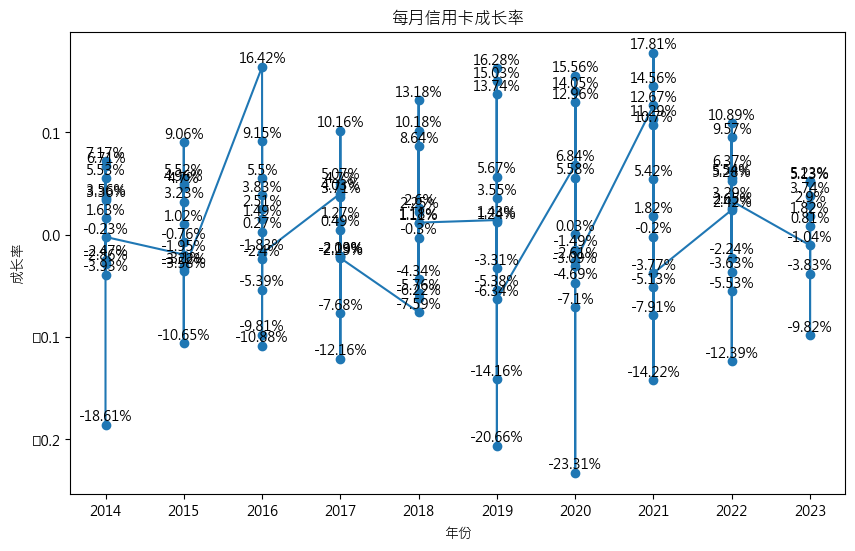

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('./six_test.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年月'], format='%Y%m')

# 提取年月信息为字符串形式
df['年月'] = df['年月'].dt.strftime('%Y%m')

# 按照年月分组，计算每年各个月份的信用卡消费总额
monthly_total_expenses = df.groupby(['年月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 计算每月的成长率
monthly_total_expenses['成長率'] = monthly_total_expenses['信用卡交易金額[新台幣]'].pct_change()

# 移除第一行，因为成长率对于第一个月无效
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 列轉換為 datetime 並提取年份
monthly_total_expenses['年份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.year

# 顯示結果
print(monthly_total_expenses)

# 設定圖的大小
plt.figure(figsize=(10, 6))

# 繪製折線圖
plt.plot(monthly_total_expenses['年份'], monthly_total_expenses['成長率'], marker='o')
plt.title('每月信用卡成长率')
plt.xlabel('年份')
plt.ylabel('成长率')

# 設定 x 軸刻度
unique_years = monthly_total_expenses['年份'].unique()
plt.xticks(unique_years)

# 在每個點上標示成長百分比
for year, growth_rate in zip(monthly_total_expenses['年份'], monthly_total_expenses['成長率']):
    plt.text(year, growth_rate, f'{round(growth_rate*100, 2)}%', ha='center', va='bottom')

plt.show()


         年月  信用卡交易金額[新台幣]       成長率    年份  月份
1    201402   62505801850 -0.186127  2014   2
2    201403   63526607164  0.016331  2014   3
3    201404   65788821735  0.035611  2014   4
4    201405   70200355390  0.067056  2014   5
5    201406   68195962076 -0.028552  2014   6
..      ...           ...       ...   ...  ..
112  202305  168882656190  0.037439  2023   5
113  202306  162415021002 -0.038297  2023   6
114  202307  170739795168  0.051256  2023   7
115  202308  179663600973  0.052266  2023   8
116  202309  181112276478  0.008063  2023   9

[116 rows x 5 columns]
      年份  月份     預測成長率
0   2024   1  0.000311
1   2024   2  0.005578
2   2024   3  0.010844
3   2024   4  0.016110
4   2024   5  0.021377
5   2024   6  0.026643
6   2024   7  0.031910
7   2024   8  0.037176
8   2024   9  0.042442
9   2024  10  0.047709
10  2024  11  0.052975
11  2024  12  0.058242


c:\GitHub\ctest\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


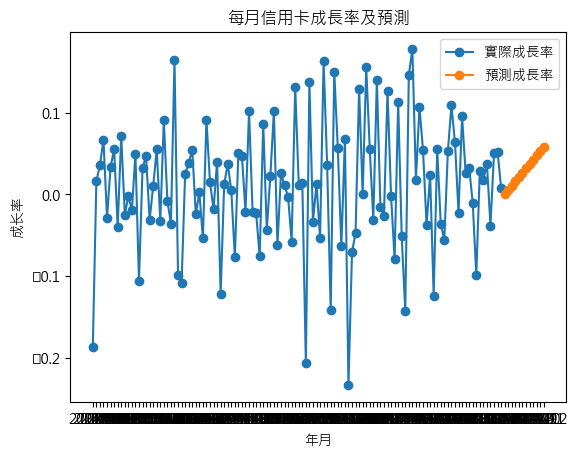

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('./six_test.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年月'], format='%Y%m')

# 提取年月信息为字符串形式
df['年月'] = df['年月'].dt.strftime('%Y%m')

# 按照年月分组，计算每年各个月份的信用卡消费总额
monthly_total_expenses = df.groupby(['年月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 计算每月的成长率
monthly_total_expenses['成長率'] = monthly_total_expenses['信用卡交易金額[新台幣]'].pct_change()

# 移除第一行，因为成长率对于第一个月无效
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 列轉換為 datetime 並提取年份和月份
monthly_total_expenses['年份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.year
monthly_total_expenses['月份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.month

# 顯示結果
print(monthly_total_expenses)

# 特徵工程
X = monthly_total_expenses[['年份', '月份']]
y = monthly_total_expenses['成長率']

# 訓練測試集拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 預測明年每個月的成長率
next_year = pd.DataFrame({'年份': [2024] * 12, '月份': range(1, 13)})
predicted_growth_rate = model.predict(next_year)

# 將預測的成長率合併到DataFrame
next_year['預測成長率'] = predicted_growth_rate

# 顯示結果
print(next_year)

# 繪製折線圖
plt.plot(monthly_total_expenses['年月'], monthly_total_expenses['成長率'], marker='o', label='實際成長率')
plt.plot(next_year['年份'].astype(str) + next_year['月份'].astype(str).str.zfill(2), next_year['預測成長率'], marker='o', label='預測成長率')
plt.title('每月信用卡成長率及預測')
plt.xlabel('年月')
plt.ylabel('成长率')
plt.legend()
plt.show()


         年月  信用卡交易金額[新台幣]       成長率    年份  月份
1    201402   62505801850 -0.186127  2014   2
2    201403   63526607164  0.016331  2014   3
3    201404   65788821735  0.035611  2014   4
4    201405   70200355390  0.067056  2014   5
5    201406   68195962076 -0.028552  2014   6
..      ...           ...       ...   ...  ..
112  202305  168882656190  0.037439  2023   5
113  202306  162415021002 -0.038297  2023   6
114  202307  170739795168  0.051256  2023   7
115  202308  179663600973  0.052266  2023   8
116  202309  181112276478  0.008063  2023   9

[116 rows x 5 columns]
     年份  月份     預測成長率
0  2023  10  0.037114
1  2023  11  0.041396
2  2023  12  0.045677


c:\GitHub\ctest\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


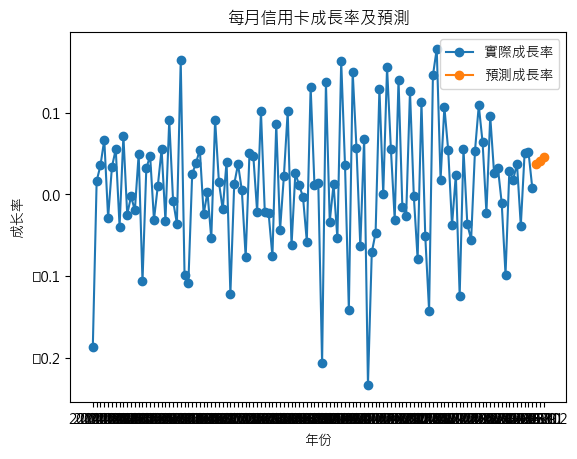

In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('./six_test.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年月'], format='%Y%m')

# 提取年月信息为字符串形式
df['年月'] = df['年月'].dt.strftime('%Y%m')

# 按照年月分组，计算每年各个月份的信用卡消费总额
monthly_total_expenses = df.groupby(['年月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 计算每月的成长率
monthly_total_expenses['成長率'] = monthly_total_expenses['信用卡交易金額[新台幣]'].pct_change()

# 移除第一行，因为成长率对于第一个月无效
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 列轉換為 datetime 並提取年份和月份
monthly_total_expenses['年份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.year
monthly_total_expenses['月份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.month

# 顯示結果
print(monthly_total_expenses)

# 特徵工程
X = monthly_total_expenses[['年份', '月份']]
y = monthly_total_expenses['成長率']

# 創建線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X, y)

# 預測2023年10月、11月和12月的成長率
next_months = pd.DataFrame({'年份': [2023] * 3, '月份': [10, 11, 12]})
predicted_growth_rate = model.predict(next_months)

# 將預測的成長率合併到DataFrame
next_months['預測成長率'] = predicted_growth_rate

# 顯示結果
print(next_months)

# 繪製折線圖
plt.plot(monthly_total_expenses['年月'], monthly_total_expenses['成長率'], marker='o', label='實際成長率')
plt.plot(next_months['年份'].astype(str) + next_months['月份'].astype(str).str.zfill(2), next_months['預測成長率'], marker='o', label='預測成長率')
plt.title('每月信用卡成長率及預測')
plt.xlabel('年份')
plt.ylabel('成长率')
plt.legend()
plt.show()


         年月  信用卡交易金額[新台幣]    年份  月份
1    201402   62505801850  2014   2
2    201403   63526607164  2014   3
3    201404   65788821735  2014   4
4    201405   70200355390  2014   5
5    201406   68195962076  2014   6
..      ...           ...   ...  ..
112  202305  168882656190  2023   5
113  202306  162415021002  2023   6
114  202307  170739795168  2023   7
115  202308  179663600973  2023   8
116  202309  181112276478  2023   9

[116 rows x 4 columns]
     年份  月份       預測信用卡金額
0  2023  10  1.468756e+11
1  2023  11  1.482709e+11
2  2023  12  1.496662e+11


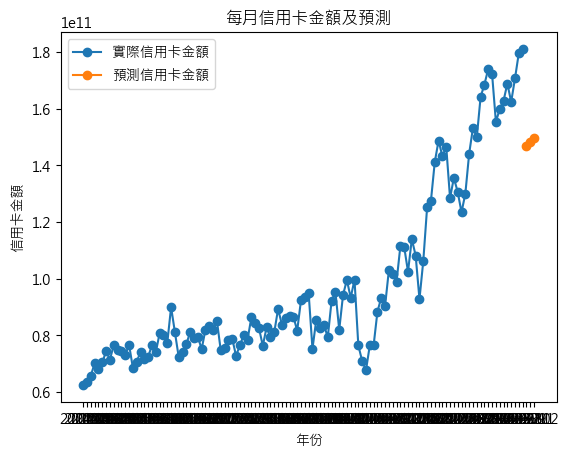

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('./six_test.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年月'], format='%Y%m')

# 提取年月信息為字符串形式
df['年月'] = df['年月'].dt.strftime('%Y%m')

# 按照年月分组，计算每年各个月份的信用卡消费总额
monthly_total_expenses = df.groupby(['年月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 移除第一行，因為成长率對於第一个月無效
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 列轉換為 datetime 並提取年份和月份
monthly_total_expenses['年份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.year
monthly_total_expenses['月份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.month

# 顯示結果
print(monthly_total_expenses)

# 特徵工程
X = monthly_total_expenses[['年份', '月份']]
y = monthly_total_expenses['信用卡交易金額[新台幣]']

# 創建線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X, y)

# 預測2023年10月、11月和12月的信用卡金額
next_months = pd.DataFrame({'年份': [2023] * 3, '月份': [10, 11, 12]})
predicted_credit_amount = model.predict(next_months)

# 將預測的信用卡金額合併到DataFrame
next_months['預測信用卡金額'] = predicted_credit_amount

# 顯示結果
print(next_months)

# 繪製折線圖
plt.plot(monthly_total_expenses['年月'], monthly_total_expenses['信用卡交易金額[新台幣]'], marker='o', label='實際信用卡金額')
plt.plot(next_months['年份'].astype(str) + next_months['月份'].astype(str).str.zfill(2), next_months['預測信用卡金額'], marker='o', label='預測信用卡金額')
plt.title('每月信用卡金額及預測')
plt.xlabel('年份')
plt.ylabel('信用卡金額')
plt.legend()
plt.show()


# 均方誤差/R平方

In [53]:
from sklearn.metrics import mean_squared_error

# 實際成長率
actual_growth_rate = monthly_total_expenses['成長率']

# 預測成長率
predicted_growth_rate = model.predict(X)

# 計算均方誤差
mse = mean_squared_error(actual_growth_rate, predicted_growth_rate)

print(f'均方誤差（MSE）: {mse}')


均方誤差（MSE）: 0.005836873776794232


In [54]:
# 計算 R-squared
r_squared = model.score(X, actual_growth_rate)

print(f'R-squared: {r_squared}')


R-squared: 0.04002506537911554


In [12]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

年         年齡層           2014           2015           2016           2017  \
0   20(含)-25歲   18003.712808   20666.470240   22932.456288   24680.846902   
1   25(含)-30歲   65106.861975   68405.154374   74674.787032   75294.887633   
2   30(含)-35歲  115435.440327  117458.244168  121024.035312  111808.761104   
3   35(含)-40歲  133683.916012  139991.480259  147716.153840  141934.385793   
4   40(含)-45歲  132267.084101  136144.433172  144402.772216  143459.442412   
5   45(含)-50歲  128574.559158  133975.172595  142376.623519  139823.286094   
6   50(含)-55歲  104613.420103  111587.076578  120258.543059  120777.191577   
7   55(含)-60歲   73963.894009   78778.019065   84111.231459   86926.255664   
8   60(含)-65歲   45429.514130   50766.916854   55169.333126   58204.229930   
9   65(含)-70歲   17706.157086   22144.528536   26668.949173   31190.121320   
10  70(含)-75歲    7120.346421    7908.833001    8422.938171    9869.545890   
11  75(含)-80歲    2802.327940    3285.686110    3703.489318    4173.148606   

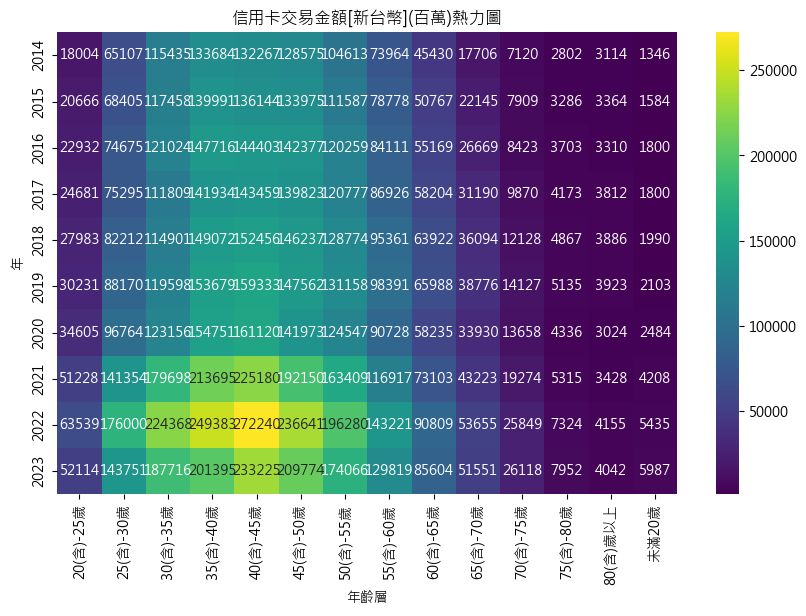

In [20]:
df = pd.read_csv("../processed_dataset.csv")
df["信用卡交易金額[新台幣]"] = df["信用卡交易金額[新台幣]"] / 1000000
df["信用卡交易筆數"] = df["信用卡交易筆數"] / 1000000

grouped_data = (
    df.groupby(["年", "年齡層"])
    .agg({"信用卡交易金額[新台幣]": "sum", "信用卡交易筆數": "sum"})
    .reset_index()
)


# 計算 '平均交易金額'
grouped_data["平均交易金額"] = grouped_data["信用卡交易金額[新台幣]"] / grouped_data["信用卡交易筆數"]

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(
    index="年齡層", columns="年", values="信用卡交易金額[新台幣]", aggfunc="mean"
)

#  四捨五入並轉換為整數
# pivot_table_year = pivot_table_year.round().astype(int)


# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams["font.family"] = "Microsoft JhengHei"
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index("年齡層").T, cmap="viridis", annot=True, fmt=".0f")
plt.title("信用卡交易金額[新台幣](百萬)熱力圖")
plt.show()

In [51]:
import pandas as pd
import plotly.express as px

# Read the CSV file
df = pd.read_csv("../processed_dataset.csv")

# Convert columns to millions
df["信用卡交易金額[新台幣]"] = df["信用卡交易金額[新台幣]"] / 1000000
df["信用卡交易筆數"] = df["信用卡交易筆數"] / 1000000

# Group by year and age group, and aggregate the data
grouped_data = (
    df.groupby(["年", "年齡層"])
    .agg({"信用卡交易金額[新台幣]": "sum", "信用卡交易筆數": "sum"})
    .reset_index()
)

# Calculate '平均交易金額'
grouped_data["平均交易金額"] = grouped_data["信用卡交易金額[新台幣]"] / grouped_data["信用卡交易筆數"]

print(grouped_data)

# Pivot the data
pivot_table_year = grouped_data.pivot_table(
    index="年", columns="年齡層", values="平均交易金額", aggfunc="mean"
)

# Reset the index
pivot_table_year.reset_index(inplace=True)

# Display the result
print(pivot_table_year)

# Plot the heatmap using Plotly
fig = px.imshow(
    pivot_table_year.set_index("年"),
    labels=dict(x="年齡層", y="年", color="平均交易金額"),
    color_continuous_scale="viridis",
    text_auto=True
)
fig.update_layout(title="信用卡交易金額[新台幣](百萬)熱力圖")
fig.show()

        年        年齡層   信用卡交易金額[新台幣]    信用卡交易筆數       平均交易金額
0    2014  20(含)-25歲   18003.712808  10.677869  1686.077326
1    2014  25(含)-30歲   65106.861975  35.350280  1841.763685
2    2014  30(含)-35歲  115435.440327  59.009960  1956.202653
3    2014  35(含)-40歲  133683.916012  65.643983  2036.499157
4    2014  40(含)-45歲  132267.084101  60.846231  2173.792558
..    ...        ...            ...        ...          ...
135  2023  65(含)-70歲   51550.637469  26.984305  1910.393374
136  2023  70(含)-75歲   26118.136370  13.546631  1928.017111
137  2023  75(含)-80歲    7952.047700   3.946023  2015.205613
138  2023   80(含)歲以上    4042.127029   1.897012  2130.786220
139  2023      未滿20歲    5987.238970  10.395541   575.942990

[140 rows x 5 columns]
年齡層     年    20(含)-25歲    25(含)-30歲    30(含)-35歲    35(含)-40歲    40(含)-45歲  \
0    2014  1686.077326  1841.763685  1956.202653  2036.499157  2173.792558   
1    2015  1652.824681  1793.692697  1870.086588  1933.463914  2078.364415   
2    2016  1494.730728

In [50]:
import pandas as pd
import plotly.express as px

# Read the CSV file
df = pd.read_csv("../processed_dataset.csv")

# Convert columns to millions
df["信用卡交易金額[新台幣]"] = df["信用卡交易金額[新台幣]"] / 1000000
df["信用卡交易筆數"] = df["信用卡交易筆數"] / 1000000

# Group by year and age group, and aggregate the data
grouped_data = (
    df.groupby(["年齡層", "地區"])
    .agg({"信用卡交易金額[新台幣]": "sum", "信用卡交易筆數": "sum"})
    .reset_index()
)

# Calculate '平均交易金額'
grouped_data["平均交易金額"] = grouped_data["信用卡交易金額[新台幣]"] / grouped_data["信用卡交易筆數"]

print(grouped_data)

# Pivot the data
pivot_table_year = grouped_data.pivot_table(
    index="地區", columns="年齡層", values="平均交易金額", aggfunc="mean"
)

# Reset the index
pivot_table_year.reset_index(inplace=True)

# Display the result
print(pivot_table_year)

# Plot the heatmap using Plotly
fig = px.imshow(
    pivot_table_year.set_index("地區"),
    labels=dict(x="年齡層", y="地區", color="平均交易金額"),
    color_continuous_scale="viridis",
    text_auto=True,
)
fig.update_layout(title="信用卡交易金額[新台幣](百萬)熱力圖")
fig.show()

          年齡層   地區   信用卡交易金額[新台幣]     信用卡交易筆數       平均交易金額
0   20(含)-25歲  新北市   34898.397474   56.482554   617.861534
1   20(含)-25歲  桃園市   26031.306521   18.621381  1397.925671
2   20(含)-25歲  臺中市   40115.346845   28.628394  1401.243355
3   20(含)-25歲  臺北市  198510.904089  259.943262   763.670128
4   20(含)-25歲  臺南市   16546.441130   13.486225  1226.914213
..        ...  ...            ...         ...          ...
79      未滿20歲  桃園市    1784.003501    1.484858  1201.464046
80      未滿20歲  臺中市    2442.320412    2.023074  1207.232366
81      未滿20歲  臺北市   15847.742170   22.479253   704.994164
82      未滿20歲  臺南市    1071.879136    0.971348  1103.496518
83      未滿20歲  高雄市    2067.136001    1.668984  1238.559507

[84 rows x 5 columns]
年齡層   地區    20(含)-25歲    25(含)-30歲    30(含)-35歲    35(含)-40歲    40(含)-45歲  \
0    新北市   617.861534   798.671095   959.397355  1106.211931  1243.282144   
1    桃園市  1397.925671  1704.684011  1844.018554  1918.530243  2037.683755   
2    臺中市  1401.243355  1763.427809  19

In [48]:
import pandas as pd
import plotly.express as px

# Read the CSV file
df = pd.read_csv("../processed_dataset.csv")

# Convert columns to millions
df["信用卡交易金額[新台幣]"] = df["信用卡交易金額[新台幣]"] / 10000000
df["信用卡交易筆數"] = df["信用卡交易筆數"] / 10000000

# Group by year and age group, and aggregate the data
grouped_data = (
    df.groupby(["產業別", "年齡層"])
    .agg({"信用卡交易金額[新台幣]": "sum", "信用卡交易筆數": "sum"})
    .reset_index()
)

# Calculate '平均交易金額'
grouped_data["平均交易金額"] = grouped_data["信用卡交易金額[新台幣]"] / grouped_data["信用卡交易筆數"]

print(grouped_data)

# Pivot the data
pivot_table_year = grouped_data.pivot_table(
    index="產業別", columns="年齡層", values="信用卡交易金額[新台幣]", aggfunc="mean"
)

# Reset the index
pivot_table_year.reset_index(inplace=True)

# Display the result
print(pivot_table_year)

# Plot the heatmap using Plotly
fig = px.imshow(
    pivot_table_year.set_index("產業別"),
    labels=dict(x="產業別", y="年齡層", color="信用卡交易金額[新台幣]"),
    color_continuous_scale="viridis",
    text_auto=True,
)
fig.update_layout(title="信用卡交易金額[新台幣](百萬)熱力圖", height=500, width=900)
fig.show()

   產業別        年齡層  信用卡交易金額[新台幣]   信用卡交易筆數       平均交易金額
0    住  20(含)-25歲   2546.043067  1.259111  2022.095641
1    住  25(含)-30歲   8763.501286  3.219426  2722.069489
2    住  30(含)-35歲  13786.203101  4.213251  3272.106127
3    住  35(含)-40歲  16309.584952  4.736083  3443.686398
4    住  40(含)-45歲  16608.348808  4.462921  3721.407419
..  ..        ...           ...       ...          ...
79   食  65(含)-70歲   7719.719514  6.093070  1266.967251
80   食  70(含)-75歲   3237.140545  2.502257  1293.688173
81   食  75(含)-80歲   1216.444621  0.916644  1327.062586
82   食   80(含)歲以上    845.953033  0.572346  1478.045582
83   食      未滿20歲    498.576540  1.427518   349.261099

[84 rows x 5 columns]
年齡層   產業別    20(含)-25歲     25(含)-30歲     30(含)-35歲     35(含)-40歲  \
0       住  2546.043067   8763.501286  13786.203101  16309.584952   
1    文教康樂  8515.864845  22422.315222  28377.926025  33187.404274   
2      百貨  8987.220623  28406.322326  40816.610426  49442.729442   
3       行  5039.056216  14515.026853  20639.8

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read CSV file
df = pd.read_csv('./six_test.csv')

# Data preprocessing
df['年月'] = pd.to_datetime(df['年月'], format='%Y%m')
df['年'] = df['年月'].dt.year
df['月'] = df['年月'].dt.month
monthly_total_expenses = df.groupby(['年', '月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# Time series forecasting - ARIMA model
# Assuming '信用卡交易金額[新台幣]' is the transaction amount column
# Remove first row as it contains NaN after calculating growth rate
monthly_total_expenses['信用卡交易金額[新台幣]'] = monthly_total_expenses['信用卡交易金額[新台幣]'].pct_change().iloc[1:]

# Fit ARIMA model
model = ARIMA(monthly_total_expenses['信用卡交易金額[新台幣]'], order=(1, 1, 1))  # You may need to adjust the order based on your data
result = model.fit()

# Forecast for 2023 (adjust the number of periods accordingly)
forecast_steps = 12  # Assuming monthly data, forecasting for the next 12 months
forecast_values = result.get_forecast(steps=forecast_steps).predicted_mean

# Generate future months for plotting
last_date = monthly_total_expenses['年月'].max()
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_expenses['年月'], monthly_total_expenses['信用卡交易金額[新台幣]'], marker='o', label='Actual')
plt.plot(future_dates, forecast_values, marker='o', linestyle='dashed', color='red', label='Forecast')
plt.title('Monthly Credit Card Transactions with Forecast for 2023')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Amount [新台幣]')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: '年月'

In [ ]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv("../six_age.csv")

# 使用 groupby 函數將資料按照產業別進行分組
grouped_df = df.groupby('產業別')

# 計算各產業別的金額總和
sum_by_industry = grouped_df['信用卡交易金額'].sum()

# 顯示結果
print(sum_by_industry)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 讀取 CSV 檔案
df = pd.read_csv("../six_cities.csv")

# 使用 groupby 函數將資料按照產業別、年和月進行分組
grouped_df = df.groupby(['產業別', '年', '月'])

# 計算各產業別的金額總和和信用卡交易筆數
result = grouped_df.agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'})

# 將索引重置，以將 '產業別', '年', '月' 移到欄位
result = result.reset_index()

# 進行標準化
std = StandardScaler()
result1 = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']]
arr = std.fit_transform(result1)
result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']] = arr

# 計算皮爾森相關係數
correlation_matrix = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']].corr(method='pearson')

correlation_matrix


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取 CSV 檔案
df = pd.read_csv("../six_cities.csv")

# 使用 groupby 函數將資料按照產業別、年和月進行分組
grouped_df = df.groupby(['產業別', '年', '月'])

# 計算各產業別的金額總和和信用卡交易筆數
result = grouped_df.agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'})

# 將索引重置，以將 '產業別', '年', '月' 移到欄位
result = result.reset_index()

# 進行標準化
std = StandardScaler()
result1 = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']]
arr = std.fit_transform(result1)
result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']] = arr
print(result)

# 計算皮爾森相關係數
correlation_matrix = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']].corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True, )


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

df = pd.read_csv("../modified_six_cities.csv")
df = df[(df["產業別"] != "其他")]
dict1 = {'男性':1, '女性':2}
dict2 = {'臺北市':1, '新北市':2, '桃園市':3, '臺中市':4, '臺南市':5, '高雄市':6}
dict3 = {'食':1, '衣':2, '住':3, '行':4, '文教康樂':5, '百貨':6}
df['性別'].replace(dict1, inplace=True)
df['地區'].replace(dict2, inplace=True)
df['產業別'].replace(dict3, inplace=True)

df

In [ ]:
km = KMeans(n_clusters=5)  #n_clusters = ? 設定分?群
km.fit(df)
km.labels_

In [ ]:
df['類別'] = km.labels_
df

# 線性回歸

In [ ]:
import pandas as pd

# 讀取資料集
df = pd.read_csv("../age_trans.csv")

# 排除產業別為 "其他"
df = df[(df["產業別"] != "其他")]

# 保留六都的資料，假設六都的地區為 ["台北", "新北", "桃園", "台中", "台南", "高雄"]
six_cities = ["臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市"]
df_six_cities = df[df["地區"].isin(six_cities)]

# 儲存處理後的資料
df_six_cities.to_csv("processed_dataset.csv", index=False)

In [15]:
import pandas as pd

# 讀取第一個資料集
df1 = pd.read_csv("../processed_dataset.csv")

# 讀取第二個資料集，假設擁有年月資料的 CSV 檔案名稱為 "another_dataset.csv"
df2 = pd.read_csv("../age.csv")

# Merge dataframes using left join
merged_df = pd.merge(df1, df2, on='信用卡交易筆數', how='left')

# 儲存合併後的資料
merged_df.to_csv("final_dataset.csv", index=False)


In [ ]:
import pandas as pd

# 讀取資料集
df = pd.read_csv("../age_trans.csv")

# 排除產業別為 "其他"
df = df[(df["產業別"] != "其他") & (df["年齡層"] != "未滿20歲")]

# 保留六都的資料，假設六都的地區為 ["台北", "新北", "桃園", "台中", "台南", "高雄"]
six_cities = ["臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市"]
df_six_cities = df[df["地區"].isin(six_cities)]

# 儲存處理後的資料
df_six_cities.to_csv("processed_dataset_no20.csv", index=False)

In [5]:
df = pd.read_csv("../processed_dataset.csv")
df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,高雄市,衣,女性,未滿20歲,275,483277
1,2014,1,高雄市,衣,女性,20(含)-25歲,6653,14861538
2,2014,1,高雄市,衣,女性,25(含)-30歲,15975,37941915
3,2014,1,高雄市,衣,女性,30(含)-35歲,28644,69910025
4,2014,1,高雄市,衣,女性,35(含)-40歲,34139,81103642
...,...,...,...,...,...,...,...,...
117931,2023,9,桃園市,行,男性,60(含)-65歲,58639,168066153
117932,2023,9,桃園市,行,男性,65(含)-70歲,33620,101404399
117933,2023,9,桃園市,行,男性,70(含)-75歲,15637,46138814
117934,2023,9,桃園市,行,男性,75(含)-80歲,3929,11460588


In [6]:
from sklearn.preprocessing import LabelEncoder

# Assuming "地區" is a categorical variable in your dataframe
le = LabelEncoder()
df['地區_encoded'] = le.fit_transform(df['地區'])

# Display the updated dataframe
print(df[['地區', '地區_encoded']])


         地區  地區_encoded
0       高雄市           5
1       高雄市           5
2       高雄市           5
3       高雄市           5
4       高雄市           5
...     ...         ...
117931  桃園市           1
117932  桃園市           1
117933  桃園市           1
117934  桃園市           1
117935  桃園市           1

[117936 rows x 2 columns]


In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of the dataframe to avoid modifying the original dataframe
df_encoded = df.copy()

# Encode the "地區" column
le_region = LabelEncoder()
df_encoded['地區_encoded'] = le_region.fit_transform(df_encoded['地區'])

# Encode the "產業" column
le_industry = LabelEncoder()
df_encoded['產業_encoded'] = le_industry.fit_transform(df_encoded['產業別'])

# Encode the "性別" column
le_gender = LabelEncoder()
df_encoded['性別_encoded'] = le_gender.fit_transform(df_encoded['性別'])

# Encode the "年齡層" column
le_age_group = LabelEncoder()
df_encoded['年齡層_encoded'] = le_age_group.fit_transform(df_encoded['年齡層'])

# Save the updated dataframe to a CSV file
df_encoded.to_csv("processed_dataset_encoded.csv", index=False)

# Display the updated dataframe
print(df_encoded[['地區_encoded', '產業_encoded', '性別_encoded', '年齡層_encoded']])

df_encoded


        地區_encoded  產業_encoded  性別_encoded  年齡層_encoded
0                5           4           0           13
1                5           4           0            0
2                5           4           0            1
3                5           4           0            2
4                5           4           0            3
...            ...         ...         ...          ...
117931           1           3           1            8
117932           1           3           1            9
117933           1           3           1           10
117934           1           3           1           11
117935           1           3           1           12

[117936 rows x 4 columns]


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],地區_encoded,產業_encoded,性別_encoded,年齡層_encoded
0,2014,1,高雄市,衣,女性,未滿20歲,275,483277,5,4,0,13
1,2014,1,高雄市,衣,女性,20(含)-25歲,6653,14861538,5,4,0,0
2,2014,1,高雄市,衣,女性,25(含)-30歲,15975,37941915,5,4,0,1
3,2014,1,高雄市,衣,女性,30(含)-35歲,28644,69910025,5,4,0,2
4,2014,1,高雄市,衣,女性,35(含)-40歲,34139,81103642,5,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
117931,2023,9,桃園市,行,男性,60(含)-65歲,58639,168066153,1,3,1,8
117932,2023,9,桃園市,行,男性,65(含)-70歲,33620,101404399,1,3,1,9
117933,2023,9,桃園市,行,男性,70(含)-75歲,15637,46138814,1,3,1,10
117934,2023,9,桃園市,行,男性,75(含)-80歲,3929,11460588,1,3,1,11


In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of the dataframe to avoid modifying the original dataframe
df_encoded = df.copy()

# Encode the "地區" column
le_region = LabelEncoder()
df_encoded['地區_encoded'] = le_region.fit_transform(df_encoded['地區'])

# Encode the "產業" column
le_industry = LabelEncoder()
df_encoded['產業_encoded'] = le_industry.fit_transform(df_encoded['產業別'])

# Encode the "性別" column
le_gender = LabelEncoder()
df_encoded['性別_encoded'] = le_gender.fit_transform(df_encoded['性別'])

# Encode the "年齡層" column
le_age_group = LabelEncoder()
df_encoded['年齡層_encoded'] = le_age_group.fit_transform(df_encoded['年齡層'])

# Drop the original categorical columns
df_encoded = df_encoded.drop(['地區', '產業別', '性別', '年齡層'], axis=1)

# Save the updated dataframe to a CSV file
df_encoded.to_csv("processed_dataset_encoded.csv", index=False)

# Display the updated dataframe
print(df_encoded)
df_encoded


           年  月  信用卡交易筆數  信用卡交易金額[新台幣]  地區_encoded  產業_encoded  性別_encoded  \
0       2014  1      275        483277           5           4           0   
1       2014  1     6653      14861538           5           4           0   
2       2014  1    15975      37941915           5           4           0   
3       2014  1    28644      69910025           5           4           0   
4       2014  1    34139      81103642           5           4           0   
...      ... ..      ...           ...         ...         ...         ...   
117931  2023  9    58639     168066153           1           3           1   
117932  2023  9    33620     101404399           1           3           1   
117933  2023  9    15637      46138814           1           3           1   
117934  2023  9     3929      11460588           1           3           1   
117935  2023  9     1465       4755361           1           3           1   

        年齡層_encoded  
0                13  
1                 0

,年,月,信用卡交易筆數,信用卡交易金額[新台幣],地區_encoded,產業_encoded,性別_encoded,年齡層_encoded
0,2014,1,275,483277,5,4,0,13
1,2014,1,6653,14861538,5,4,0,0
2,2014,1,15975,37941915,5,4,0,1
3,2014,1,28644,69910025,5,4,0,2
4,2014,1,34139,81103642,5,4,0,3
...,...,...,...,...,...,...,...,...
117931,2023,9,58639,168066153,1,3,1,8
117932,2023,9,33620,101404399,1,3,1,9
117933,2023,9,15637,46138814,1,3,1,10
117934,2023,9,3929,11460588,1,3,1,11


In [9]:
df = pd.read_csv('./processed_dataset_encoded.csv')
df

,年,月,信用卡交易筆數,信用卡交易金額[新台幣],地區_encoded,產業_encoded,性別_encoded,年齡層_encoded
0,2014,1,275,483277,5,4,0,13
1,2014,1,6653,14861538,5,4,0,0
2,2014,1,15975,37941915,5,4,0,1
3,2014,1,28644,69910025,5,4,0,2
4,2014,1,34139,81103642,5,4,0,3
...,...,...,...,...,...,...,...,...
117931,2023,9,58639,168066153,1,3,1,8
117932,2023,9,33620,101404399,1,3,1,9
117933,2023,9,15637,46138814,1,3,1,10
117934,2023,9,3929,11460588,1,3,1,11


In [10]:
from sklearn.preprocessing import RobustScaler

# Assuming you have numerical columns in your dataframe
numerical_columns = ['信用卡交易金額[新台幣]', '信用卡交易筆數', '地區_encoded', '產業_encoded', '性別_encoded', '年齡層_encoded']

# Create a copy of the dataframe to avoid modifying the original dataframe
df_scaled = df.copy()

# Use RobustScaler to scale numerical columns
scaler = RobustScaler()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

# Display the scaled dataframe
df_scaled


,年,月,信用卡交易筆數,信用卡交易金額[新台幣],地區_encoded,產業_encoded,性別_encoded,年齡層_encoded
0,2014,1,-0.303028,-0.404936,0.833333,0.500000,-0.5,0.928571
1,2014,1,-0.161120,-0.243746,0.833333,0.500000,-0.5,-0.928571
2,2014,1,0.046290,0.015001,0.833333,0.500000,-0.5,-0.785714
3,2014,1,0.328170,0.373386,0.833333,0.500000,-0.5,-0.642857
4,2014,1,0.450431,0.498874,0.833333,0.500000,-0.5,-0.500000
...,...,...,...,...,...,...,...,...
117931,2023,9,0.995545,1.473784,-0.500000,0.166667,0.5,0.214286
117932,2023,9,0.438883,0.726460,-0.500000,0.166667,0.5,0.357143
117933,2023,9,0.038770,0.106894,-0.500000,0.166667,0.5,0.500000
117934,2023,9,-0.221728,-0.281873,-0.500000,0.166667,0.5,0.642857


Mean Squared Error: 18788229435.549854
R-squared: 0.5559494636004163


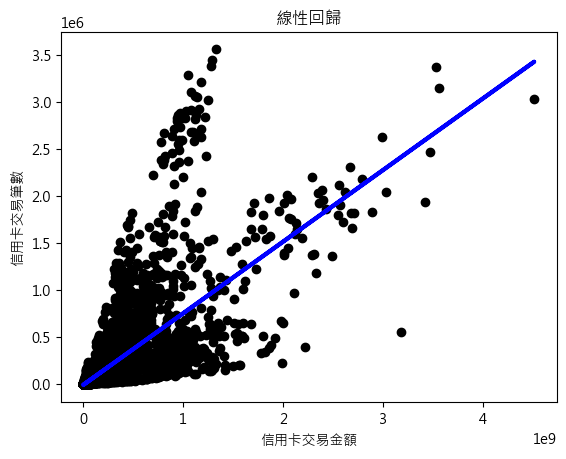

In [18]:
# 引入必要的套件
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"
# 讀取資料集
df = pd.read_csv("../processed_dataset.csv")  #未排除未滿20歲

# 假設 '信用卡交易金額' 為特徵，'信用卡交易筆數' 為目標變數
X = df[["信用卡交易金額[新台幣]"]]
y = df["信用卡交易筆數"]

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 建立線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 進行預測
y_pred = model.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# 印出評估指標
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# 繪製散點圖和回歸線
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel("信用卡交易金額")
plt.ylabel("信用卡交易筆數")
plt.title("線性回歸")
plt.show()

In [19]:
import numpy as np

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(y_test, y_pred)[0, 1]

# Print the correlation coefficient
print(f"Correlation Coefficient between y_test and y_pred: {correlation_coefficient}")


Correlation Coefficient between y_test and y_pred: 0.7457889724270033


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117936 entries, 0 to 117935
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年             117936 non-null  int64 
 1   月             117936 non-null  int64 
 2   地區            117936 non-null  object
 3   產業別           117936 non-null  object
 4   性別            117936 non-null  object
 5   年齡層           117936 non-null  object
 6   信用卡交易筆數       117936 non-null  int64 
 7   信用卡交易金額[新台幣]  117936 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.2+ MB


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 讀取資料集
df = pd.read_csv('../processed_dataset.csv')  # 請替換成你的實際檔案路徑

# 將 '年' 和 '月' 合併為日期欄位
df['日期'] = pd.to_datetime(df[['年', '月']].assign(DAY=1), format='%Y-%m-%d')

# 計算月度成長率
df['月度成長率'] = df.groupby('年')['信用卡交易筆數'].pct_change() * 100

# 刪除 NaN 值（第一個月的成長率會是 NaN）
df = df.dropna()

# 假設現在你想預測下一個月的成長率
# 你可以使用前幾個月的成長率來建立模型

# 設定特徵（X）和目標變數（y）
X = df[['月度成長率']]
y = df['月度成長率'].shift(-1)  # 將目標變數往前移動一個月，表示預測下一個月的成長率

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 使用線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 進行預測
y_pred = model.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 印出評估指標
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month,year] is missing